In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from fast_ml.model_development import train_valid_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             ConfusionMatrixDisplay,
                             classification_report)

In [ ]:
# pip install --upgrade numpy

### Obtendo splits de treino, validação e teste

In [ ]:
df_rais_2019_rs_ti = pd.read_csv('df_rais_2019_rs_ti_b.csv')

In [ ]:
df_rais_2019_rs_ti.head()

,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Sexo Trabalhador,Tamanho Estabelecimento,Diretor TI,Gerente Infraestrutura TI,Gerente Desenvolvimento Sistemas,Gerente Operação TI,Gerente Projetos TI,Gerente Segurança Informação,Gerente Suporte Técnico TI,Tecnólogo Gestão TI,Engenheiro Aplicativos Computação,Engenheiro Equip Computação,Engenheiro Sist Oper Computação,Administrador Banco Dados,Administrador Redes,Administrador Sist Operacionais,Administrador Segur Informação,Analista Desenvolv Sistemas,Analista Redes Comunic Dados,Analista Sistemas Automação,Analista Suporte Computacional
0,3,5,6,5,0,1,2764.23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,4,5,5,0,1,2700.00,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,5,2,5,0,1,1897.89,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,5,6,5,0,1,2909.34,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,5,5,5,0,1,2109.84,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_rais_2019_rs_ti[['Faixa Etária', 'Faixa Hora Contrat',	'Faixa Tempo Emprego', 'Escolaridade após 2005', 'Tamanho Estabelecimento']]

,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Tamanho Estabelecimento
0,3,5,6,5,1
1,4,4,5,5,2
2,4,5,2,5,2
3,4,5,6,5,4
4,2,5,5,5,4
...,...,...,...,...,...
16527,2,4,4,10,9
16528,4,4,2,10,9
16529,3,4,4,10,9
16530,4,4,4,10,9


In [ ]:
# Realizando padronização nas colunas que não são binárias, ou seja, aquelas que contêm as faixas etárias, de escolaridade, entre outras

sc = StandardScaler()

df_rais_2019_rs_ti[['Faixa Etária', 'Faixa Hora Contrat',
                    'Faixa Tempo Emprego', 'Escolaridade após 2005',
                    'Tamanho Estabelecimento']] = sc.fit_transform(df_rais_2019_rs_ti[['Faixa Etária', 'Faixa Hora Contrat',
                                                                                       'Faixa Tempo Emprego', 'Escolaridade após 2005', 'Tamanho Estabelecimento']])

In [ ]:
df_rais_2019_rs_ti

,Faixa Etária,Faixa Hora Contrat,Faixa Tempo Emprego,Escolaridade após 2005,Ind Portador Defic,Raça Cor,Vl Remun Dezembro Nom,Sexo Trabalhador,Tamanho Estabelecimento,Diretor TI,Gerente Infraestrutura TI,Gerente Desenvolvimento Sistemas,Gerente Operação TI,Gerente Projetos TI,Gerente Segurança Informação,Gerente Suporte Técnico TI,Tecnólogo Gestão TI,Engenheiro Aplicativos Computação,Engenheiro Equip Computação,Engenheiro Sist Oper Computação,Administrador Banco Dados,Administrador Redes,Administrador Sist Operacionais,Administrador Segur Informação,Analista Desenvolv Sistemas,Analista Redes Comunic Dados,Analista Sistemas Automação,Analista Suporte Computacional
0,-0.856791,0.706183,0.751238,-3.24099,0,1,2764.23,1,-2.343564,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.073307,-1.074028,0.292820,-3.24099,0,1,2700.00,1,-1.878614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.073307,0.706183,-1.082435,-3.24099,0,1,1897.89,1,-1.878614,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.073307,0.706183,0.751238,-3.24099,0,1,2909.34,1,-0.948715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.786890,0.706183,0.292820,-3.24099,0,1,2109.84,1,-0.948715,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16527,-1.786890,-1.074028,-0.165598,3.16642,0,1,9482.78,0,1.376034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
16528,0.073307,-1.074028,-1.082435,3.16642,0,1,7504.70,0,1.376034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16529,-0.856791,-1.074028,-0.165598,3.16642,0,1,6803.34,0,1.376034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16530,0.073307,-1.074028,-0.165598,3.16642,0,1,6746.18,0,1.376034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_rais_2019_rs_ti['Sexo Trabalhador'].value_counts()

1    13109
0     3423
Name: Sexo Trabalhador, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Sexo Trabalhador'].value_counts()[0] / df_rais_2019_rs_ti.shape[0]

0.20705298814420517

In [ ]:
df_rais_2019_rs_ti.shape[0]

16532

In [ ]:
df_rais_2019_rs_ti['Raça Cor'].value_counts()

1    15361
0     1171
Name: Raça Cor, dtype: int64

In [ ]:
df_rais_2019_rs_ti['Raça Cor'].value_counts()[0] / df_rais_2019_rs_ti.shape[0]

0.07083232518751512

In [ ]:
# Montando dataset binário com salários acima e abaixo da média

In [ ]:
# Separando em treino, validação e teste, para depois obter a média apenas do treino

x_treino, y_treino, x_valid, y_valid, x_teste, y_teste = train_valid_test_split(df_rais_2019_rs_ti, target = 'Vl Remun Dezembro Nom', 
                                                                                train_size=0.8, valid_size=0.1, test_size=0.1, random_state=0)

In [ ]:
# Media dos salários no treino

y_treino.mean()

7066.594847637063

In [ ]:
y_treino = y_treino.apply(lambda x:0 if x <= 7066.59 else 1)

In [ ]:
y_valid = y_valid.apply(lambda x:0 if x <= 7066.59 else 1)

In [ ]:
y_teste = y_teste.apply(lambda x:0 if x <= 7066.59 else 1)

In [ ]:
x_treino['Sexo Trabalhador'].value_counts()

1    10497
0     2728
Name: Sexo Trabalhador, dtype: int64

In [ ]:
y_treino.value_counts()

0    8369
1    4856
Name: Vl Remun Dezembro Nom, dtype: int64

In [ ]:
y_treino.value_counts()[0]/y_treino.count()

0.6328166351606805

In [ ]:
x_valid['Sexo Trabalhador'].value_counts()

1    1303
0     350
Name: Sexo Trabalhador, dtype: int64

In [ ]:
x_teste['Sexo Trabalhador'].value_counts()

1    1309
0     345
Name: Sexo Trabalhador, dtype: int64

In [ ]:
x_treino['Raça Cor'].value_counts()

1    12285
0      940
Name: Raça Cor, dtype: int64

In [ ]:
x_valid['Raça Cor'].value_counts()

1    1541
0     112
Name: Raça Cor, dtype: int64

In [ ]:
x_teste['Raça Cor'].value_counts()

1    1535
0     119
Name: Raça Cor, dtype: int64

In [ ]:
y_teste.value_counts()

0    1033
1     621
Name: Vl Remun Dezembro Nom, dtype: int64

In [ ]:
# Dataset ficou suavemente desbalanceado

### Treinando modelo XGBoost de modo simplificado, considerando splits de treino e teste

Acurácia: 81.80%
Precisão: 78.67%
Revocação: 70.69%
F1 Score: 74.47%


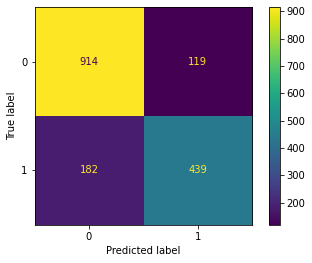

In [ ]:
modelo_xgb = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb.fit(x_treino, y_treino)
preds_xgb = modelo_xgb.predict(x_teste)

acc_xgb = accuracy_score(y_teste, preds_xgb)
prec_xgb = precision_score(y_teste, preds_xgb)
rec_xgb = recall_score(y_teste, preds_xgb)
f1_xgb = f1_score(y_teste, preds_xgb)
print('Acurácia: {:.2f}%'.format(acc_xgb*100))
print('Precisão: {:.2f}%'.format(prec_xgb*100))
print('Revocação: {:.2f}%'.format(rec_xgb*100))
print('F1 Score: {:.2f}%'.format(f1_xgb*100))

ConfusionMatrixDisplay.from_predictions(y_teste, preds_xgb)
plt.show()

## SHAP

In [ ]:
# Utilizando biblioteca de explicabilidade no modelo simplificado

In [ ]:
# pip install --upgrade shap --quiet

In [ ]:
import shap

In [ ]:
# Explicando modelo

explainer = shap.TreeExplainer(modelo_xgb)

In [ ]:
shap_values = explainer(x_treino)

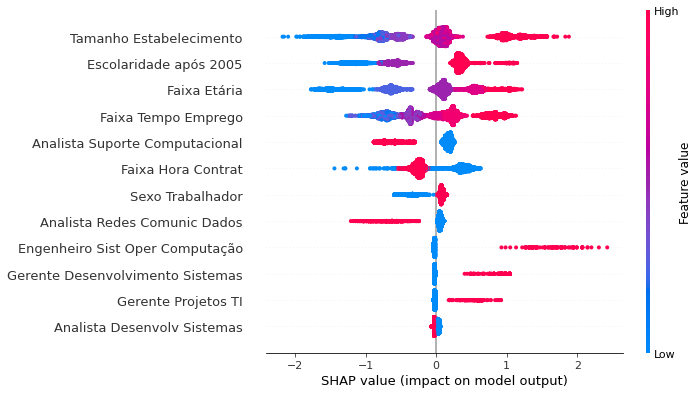

In [ ]:
# Gráfico sumarizando impacto das 12 features de maior impacto, considerando conjunto de treino

shap.summary_plot(shap_values, x_treino, max_display=12)

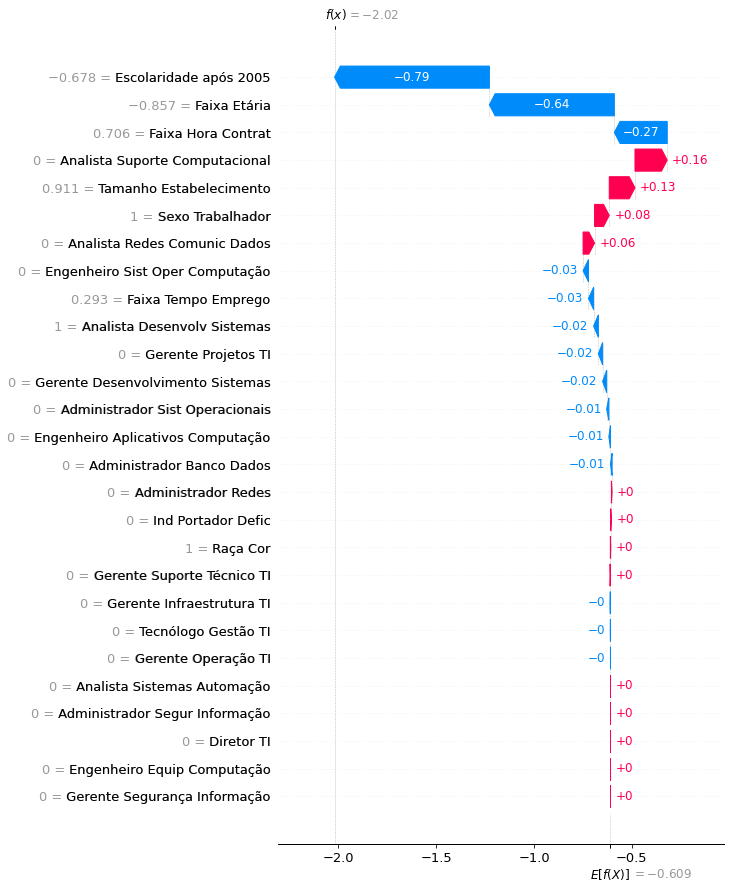

In [ ]:
# Analisando impacto de cada feature em uma determinada instância por meio da plotagem de diferentes gráficos

shap.plots.waterfall(shap_values[0], max_display=32)

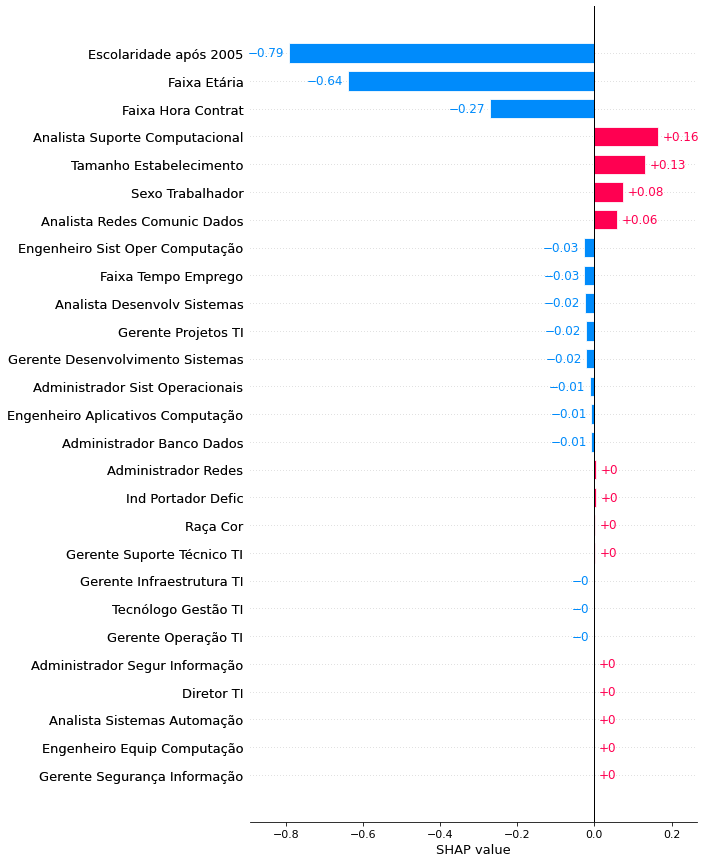

In [ ]:
shap.plots.bar(shap_values[0], max_display=32)

In [ ]:
shap.initjs()

shap.plots.force(shap_values[0])

In [ ]:
shap.initjs()

shap.plots.force(shap_values[1])

## AIF360

### Aplicação de um algoritmo pre-processing, um in-processing e um post-processing

Pre-processing: Reweighing

In-processing: Exponentiated Gradient Reduction

Post-Processing: Reject Option Classification

### Métricas analisadas:

- Disparate Impact Ratio
- Statistical Parity Difference (Mean Difference)
- Equal Opportunity Difference (True Positive Rate Difference)
- Average Odds Difference


In [ ]:
# pip install aif360[all] --quiet

In [ ]:
!cp drive/MyDrive/common_utils.py .

In [ ]:
import aif360

# Caso o aif360 não seja instalado com o parâmetro [all], será necessário instalar separadamente o fairlearn e o blackboxaudit

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import (BinaryLabelDatasetMetric,
                            ClassificationMetric)
from aif360.explainers import MetricTextExplainer
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import ExponentiatedGradientReduction
from aif360.algorithms.postprocessing import RejectOptionClassification

from tqdm import tqdm

from common_utils import compute_metrics

### Criando Binary Label Datasets (AIF360) e analisando métricas de fairness para os atributos sexo e raça no conjunto de treino

In [ ]:
unprivileged_groups_sex = [{'Sexo Trabalhador':0}]
privileged_groups_sex = [{'Sexo Trabalhador':1}]

In [ ]:
unprivileged_groups_race = [{'Raça Cor':0}]
privileged_groups_race = [{'Raça Cor':1}]

In [ ]:
df_treino_full = x_treino.copy()
df_treino_full['Vl Remun Dezembro Nom'] = y_treino.copy()

In [ ]:
# Colocando ambas variáveis sexo e raça como protegidas ao criar o binary label dataset

df_rais_BLD_train = BinaryLabelDataset(favorable_label=1,
                                      unfavorable_label=0,
                                      df=df_treino_full,
                                      label_names=['Vl Remun Dezembro Nom'],
                                      protected_attribute_names=['Sexo Trabalhador', 'Raça Cor'])

In [ ]:
# Visualizando métricas do conjunto de treino colocando apenas a variável sexo como privilegiada (masculino) e não privilegiada (feminino)

train_metrics_sex = BinaryLabelDatasetMetric(df_rais_BLD_train,
                                              unprivileged_groups=unprivileged_groups_sex,
                                              privileged_groups=privileged_groups_sex)


In [ ]:
# Obtendo o explainer para as métricas

explainer_df_rais_BLD_train_sex = MetricTextExplainer(train_metrics_sex)

In [ ]:
print(explainer_df_rais_BLD_train_sex.disparate_impact())

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.7944306114642721


In [ ]:
print(explainer_df_rais_BLD_train_sex.statistical_parity_difference())

Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.07882412011587164


In [ ]:
# Com respeito a essas duas métricas relacionadas ao dataset de treino, ele é considerado injusto na variável Sexo na Disparate Impact, pois o valor ideal seria
# entre .8 e 1.25. Já a Statistical Parity Difference está dentro do limiar aceitável entre -0.1 e 0.1.

In [ ]:
# Visualizando métricas do conjunto de treino colocando apenas a variável raça como privilegiada (brancos) e não privilegiada (demais raças)

train_metrics_race = BinaryLabelDatasetMetric(df_rais_BLD_train,
                                              unprivileged_groups=unprivileged_groups_race,
                                              privileged_groups=privileged_groups_race)

In [ ]:
# Obtendo o explainer para as métricas

explainer_df_rais_BLD_train_race = MetricTextExplainer(train_metrics_race)

In [ ]:
print(explainer_df_rais_BLD_train_race.disparate_impact())

Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.7603972033029955


In [ ]:
print(explainer_df_rais_BLD_train_race.statistical_parity_difference())

Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.08950242035348421


In [ ]:
# De maneira semelhante ao visto na varíável sexo, o conjunto de treino é considerado injusto na variável Raça na Disparate Impact, pois o valor ideal seria
# entre .8 e 1.25. Já a Statistical Parity Difference está dentro do limiar aceitável entre -0.1 e 0.1.

#### Analisando métricas do modelo simplificado

In [ ]:
# Criando função para fazer o print das métricas com base no classificador

def print_metrics(aif360_metrics):
    print(f'Classification Metrics:\n\
    Accuracy: {aif360_metrics.accuracy()}\n\
    Precision: {aif360_metrics.precision()}\n\
    Recall: {aif360_metrics.recall()}\n\n\
Fairness Metrics:\n\
    Disparate Impact Ratio: {aif360_metrics.disparate_impact()}\n\
    Statistical Parity Difference: {aif360_metrics.statistical_parity_difference()}\n\
    Equal Opportunity Difference: {aif360_metrics.equal_opportunity_difference()}\n\
    Average Odds Difference: {aif360_metrics.average_odds_difference()}')

In [ ]:
# Criando dataset aif360 de validação para posterior uso nos algoritmos de mitigação pre e post processing

df_valid_full = x_valid.copy()
df_valid_full['Vl Remun Dezembro Nom'] = y_valid.copy()

In [ ]:
df_rais_BLD_valid = BinaryLabelDataset(favorable_label=1,
                                      unfavorable_label=0,
                                      df=df_valid_full,
                                      label_names=['Vl Remun Dezembro Nom'],
                                      protected_attribute_names=['Sexo Trabalhador', 'Raça Cor'])

In [ ]:
# Para verificar as métricas de classificação do modelo base será necessário também os dataset aif360 de teste e de predição

df_teste_full = x_teste.copy()
df_teste_full['Vl Remun Dezembro Nom'] = y_teste.copy()

In [ ]:
df_rais_BLD_test = BinaryLabelDataset(favorable_label=1,
                                      unfavorable_label=0,
                                      df=df_teste_full,
                                      label_names=['Vl Remun Dezembro Nom'],
                                      protected_attribute_names=['Sexo Trabalhador', 'Raça Cor'])


In [ ]:
df_preds = df_teste_full.copy()
df_preds['Vl Remun Dezembro Nom'] = preds_xgb.copy()

In [ ]:
df_rais_BLD_preds = BinaryLabelDataset(favorable_label=1,
                                  unfavorable_label=0,
                                  df=df_preds,
                                  label_names=['Vl Remun Dezembro Nom'],
                                  protected_attribute_names=['Sexo Trabalhador', 'Raça Cor'])

In [ ]:
classif_metrics_xgb_sex = ClassificationMetric(df_rais_BLD_test,
                                              df_rais_BLD_preds,
                                              unprivileged_groups=unprivileged_groups_sex,
                                              privileged_groups=privileged_groups_sex)

In [ ]:
# Métricas de classificação e fairness do modelo original, que considera apenas treino e teste, para a variável sexo

print_metrics(classif_metrics_xgb_sex)

Classification Metrics:
    Accuracy: 0.8180169286577993
    Precision: 0.7867383512544803
    Recall: 0.7069243156199678

Fairness Metrics:
    Disparate Impact Ratio: 0.7686531734132933
    Statistical Parity Difference: -0.08200529223547126
    Equal Opportunity Difference: -0.0203644345341788
    Average Odds Difference: -0.0399940903567618


In [ ]:
# A princípio apenas a Disparate Impact sugere unfairness para a variável sexo

In [ ]:
classif_metrics_xgb_race = ClassificationMetric(df_rais_BLD_test,
                                              df_rais_BLD_preds,
                                              unprivileged_groups=unprivileged_groups_race,
                                              privileged_groups=privileged_groups_race)

In [ ]:
print_metrics(classif_metrics_xgb_race)

Classification Metrics:
    Accuracy: 0.8180169286577993
    Precision: 0.7867383512544803
    Recall: 0.7069243156199678

Fairness Metrics:
    Disparate Impact Ratio: 0.4547013610639061
    Statistical Parity Difference: -0.19147619960036133
    Equal Opportunity Difference: -0.18240270727580377
    Average Odds Difference: -0.13578809901973393


In [ ]:
# Para a variável raça todas as métricas de fairness estão fora do aceitável

#### Treinando modelo em busca da melhor acurácia balanceada com splits de treino (0.8), validação (0.1) e teste (0.1), para posterior utilização e comparação nos algoritmos de mitigação pre e post processing 

In [ ]:
# ANALISANDO PARA A VARIÁVEL SEXO

In [ ]:
# Treinando modelo

x_treino_BLD = df_rais_BLD_train.features
y_treino_BLD = df_rais_BLD_train.labels.ravel()

modelo_xgb2 = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb2.fit(x_treino_BLD,
               y_treino_BLD, 
               sample_weight=df_rais_BLD_train.instance_weights)

# Índice da classe favorável
pos_ind = np.where(modelo_xgb.classes_ == df_rais_BLD_train.favorable_label)[0][0]

In [ ]:
modelo_xgb.classes_

array([0, 1])

In [ ]:
# Scores para os conjuntos de teste e validação

dataset_orig_valid_pred = df_rais_BLD_valid.copy(deepcopy=True)
X_valid = dataset_orig_valid_pred.features
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = modelo_xgb2.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_orig_test_pred.features
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = modelo_xgb2.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
dataset_orig_valid_pred.scores

array([[0.64315486],
       [0.90366614],
       [0.63119084],
       ...,
       [0.23569877],
       [0.08707952],
       [0.10097438]], dtype=float32)

In [ ]:
# Buscando pelo melhor limiar de classificação no conjunto de validação considerando a acurácia balanceada,
# com a variável SEXO nos grupos privilegiados e não privilegiados

num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(df_rais_BLD_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups_sex,
                                             privileged_groups=privileged_groups_sex)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (original data) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (original data) = %.4f" % best_class_thresh)

Best balanced accuracy (original data) = 0.7850
Optimal classification threshold (original data) = 0.3862


In [ ]:
# Métricas das predições no conjunto de teste considerando o limiar ótimo encontrado na validação

print('Predictions from original testing data')
bal_acc_arr_orig = []
disp_imp_arr_orig = []
avg_odds_diff_arr_orig = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_orig_test_pred.scores > thresh
    dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
    dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
    metric_test_bef = compute_metrics(df_rais_BLD_test, dataset_orig_test_pred, 
                                      unprivileged_groups_sex, privileged_groups_sex,
                                      disp = disp)

    bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
    avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
    disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

Predictions from original testing data
Classification threshold used = 0.3862


 26%|██▌       | 26/100 [00:00<00:00, 253.77it/s]

Balanced accuracy = 0.7934
Statistical parity difference = -0.0823
Disparate impact = 0.8149
Average odds difference = -0.0347
Equal opportunity difference = 0.0032
Theil index = 0.1198


100%|██████████| 100/100 [00:00<00:00, 234.48it/s]


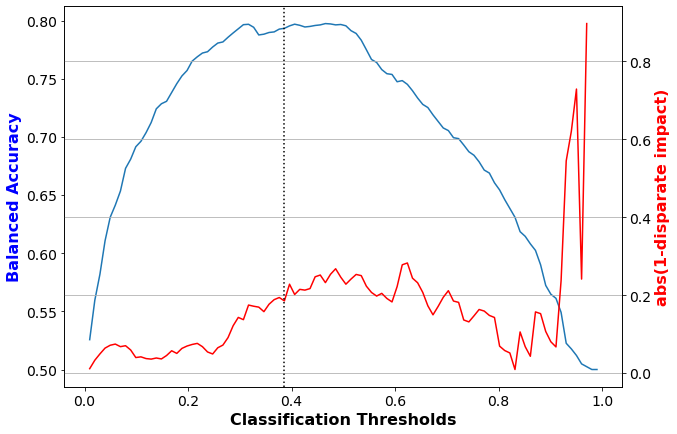

In [ ]:
# Resultados para todos os limiares no teste

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_orig)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [ ]:
# abs(1-disparate impact) perto de 0 indica predições mais justas

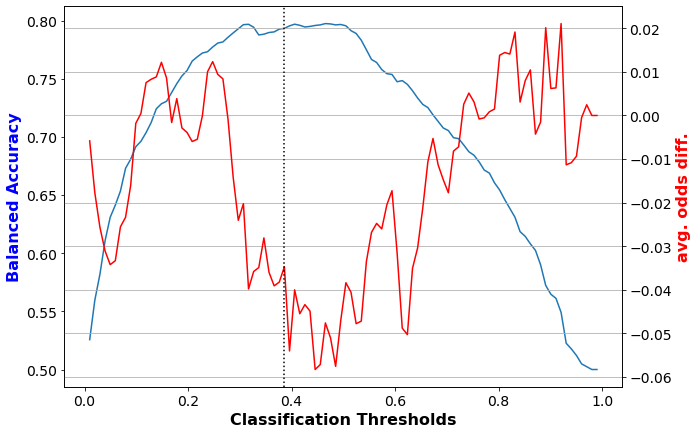

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, avg_odds_diff_arr_orig, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [ ]:
# average odds difference = 0.5((FPR_unpriv-FPR_priv)+(TPR_unpriv-TPR_priv)) perto de 0 indica predições mais justas


In [ ]:
# ANALISANDO PARA A VARIÁVEL RAÇA

In [ ]:
# Treinando modelo

x_treino_BLD = df_rais_BLD_train.features
y_treino_BLD = df_rais_BLD_train.labels.ravel()

modelo_xgb2 = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb2.fit(x_treino_BLD,
               y_treino_BLD, 
               sample_weight=df_rais_BLD_train.instance_weights)

# Índice da classe favorável
pos_ind = np.where(modelo_xgb2.classes_ == df_rais_BLD_train.favorable_label)[0][0]


In [ ]:
# Scores para os conjuntos de teste e validação

dataset_orig_valid_pred = df_rais_BLD_valid.copy(deepcopy=True)
X_valid = dataset_orig_valid_pred.features
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = modelo_xgb2.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_orig_test_pred.features
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = modelo_xgb2.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
# Buscando pelo melhor limiar de classificação no conjunto de validação considerando a acurácia balanceada,
# com a variável RAÇA nos grupos privilegiados e não privilegiados

num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(df_rais_BLD_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups_race,
                                             privileged_groups=privileged_groups_race)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (original data) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (original data) = %.4f" % best_class_thresh)

Best balanced accuracy (original data) = 0.7850
Optimal classification threshold (original data) = 0.3862


In [ ]:
# Métricas das predições no conjunto de teste considerando o limiar ótimo encontrado na validação

print('Predictions from original testing data')
bal_acc_arr_orig = []
disp_imp_arr_orig = []
avg_odds_diff_arr_orig = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_orig_test_pred.scores > thresh
    dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
    dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label
    
    metric_test_bef = compute_metrics(df_rais_BLD_test, dataset_orig_test_pred, 
                                      unprivileged_groups_race, privileged_groups_race,
                                      disp = disp)

    bal_acc_arr_orig.append(metric_test_bef["Balanced accuracy"])
    avg_odds_diff_arr_orig.append(metric_test_bef["Average odds difference"])
    disp_imp_arr_orig.append(metric_test_bef["Disparate impact"])

Predictions from original testing data
Classification threshold used = 0.3862


 39%|███▉      | 39/100 [00:00<00:00, 382.28it/s]

Balanced accuracy = 0.7934
Statistical parity difference = -0.1799
Disparate impact = 0.5915
Average odds difference = -0.1126
Equal opportunity difference = -0.1337
Theil index = 0.1198


100%|██████████| 100/100 [00:00<00:00, 376.64it/s]


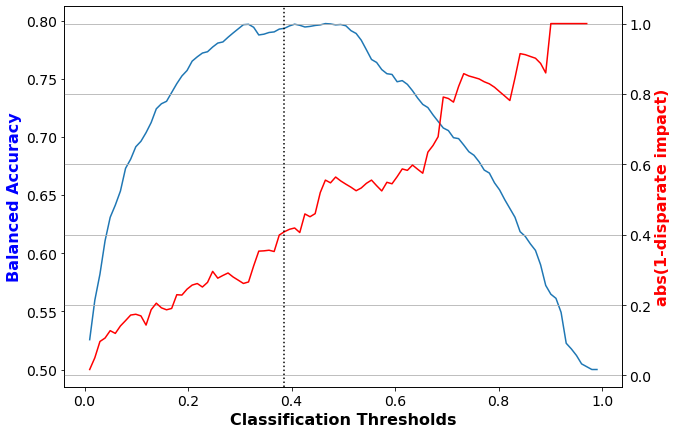

In [ ]:
# Resultados para todos os limiares no teste

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_orig)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

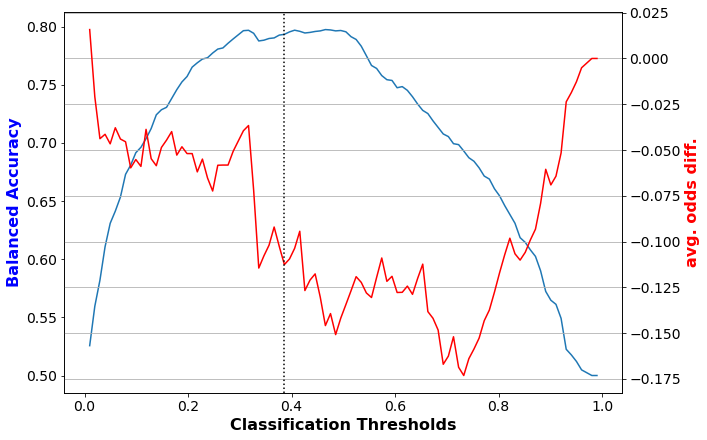

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_orig)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, avg_odds_diff_arr_orig, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

## Reweighing (pre-processing) considerando o limiar ótimo relativo a Acurácia Balanceada obtido antes da mitigação

In [ ]:
# Aplicando para a variável SEXO

RW_sex = Reweighing(unprivileged_groups=unprivileged_groups_sex,
                    privileged_groups=privileged_groups_sex)

df_rais_BLD_train_RW_sex = RW_sex.fit_transform(df_rais_BLD_train)

In [ ]:
train_metrics_RW_sex = BinaryLabelDatasetMetric(df_rais_BLD_train_RW_sex, 
                                                unprivileged_groups=unprivileged_groups_sex,
                                                privileged_groups=privileged_groups_sex)


In [ ]:
# Verificando novas métricas no conjunto de treino

In [ ]:
train_metrics_RW_sex.statistical_parity_difference()

-5.551115123125783e-17

In [ ]:
train_metrics_RW_sex.disparate_impact()

0.9999999999999999

In [ ]:
# Treinando modelo no conjunto de treino modificado com novos pesos

X_train = df_rais_BLD_train_RW_sex.features
y_train = df_rais_BLD_train_RW_sex.labels.ravel()

modelo_xgb_RW_sex = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb_RW_sex.fit(X_train, y_train,
                     sample_weight=df_rais_BLD_train_RW_sex.instance_weights)
y_train_pred = modelo_xgb_RW_sex.predict(X_train)

In [ ]:
# Scores das predições do conjunto de teste após o treino no conjunto modificado

dataset_transf_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_transf_test_pred.features
y_test = dataset_transf_test_pred.labels
dataset_transf_test_pred.scores = modelo_xgb_RW_sex.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
# Métricas das novas predições considerando o limiar ótimo de acurácia balanceada do modelo original

print('Predictions from transformed testing data')
bal_acc_arr_transf = []
disp_imp_arr_transf = []
avg_odds_diff_arr_transf = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_transf_test_pred.scores > thresh
    dataset_transf_test_pred.labels[fav_inds] = dataset_transf_test_pred.favorable_label
    dataset_transf_test_pred.labels[~fav_inds] = dataset_transf_test_pred.unfavorable_label
    
    metric_test_aft = compute_metrics(df_rais_BLD_test, dataset_transf_test_pred, 
                                      unprivileged_groups_sex, privileged_groups_sex,
                                      disp = disp)

    bal_acc_arr_transf.append(metric_test_aft["Balanced accuracy"])
    avg_odds_diff_arr_transf.append(metric_test_aft["Average odds difference"])
    disp_imp_arr_transf.append(metric_test_aft["Disparate impact"])

Predictions from transformed testing data
Classification threshold used = 0.3862


 61%|██████    | 61/100 [00:00<00:00, 159.83it/s]

Balanced accuracy = 0.7951
Statistical parity difference = -0.0290
Disparate impact = 0.9337
Average odds difference = 0.0223
Equal opportunity difference = 0.0710
Theil index = 0.1175


100%|██████████| 100/100 [00:00<00:00, 153.08it/s]


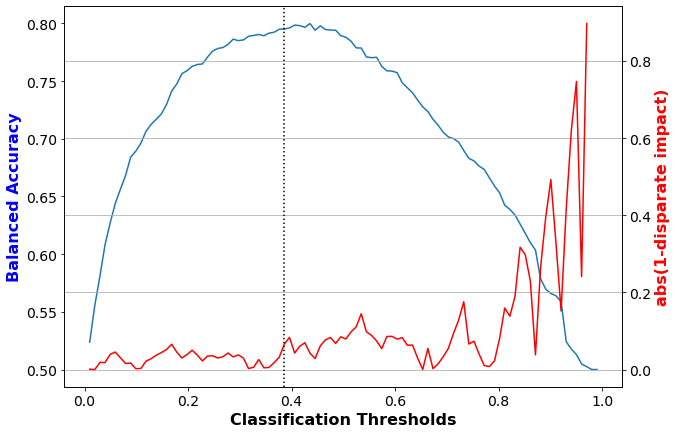

In [ ]:
# Resultados para todos os limiares no teste

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_transf)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_transf)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

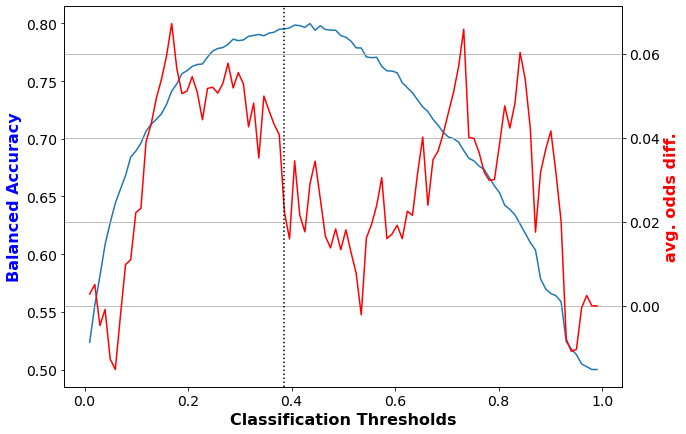

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_transf)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, avg_odds_diff_arr_transf, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

In [ ]:
###---

In [ ]:
# Construindo para a variável RAÇA

RW_race = Reweighing(unprivileged_groups=unprivileged_groups_race,
                    privileged_groups=privileged_groups_race)

df_rais_BLD_train_RW_race = RW_race.fit_transform(df_rais_BLD_train)

In [ ]:
train_metrics_RW_race = BinaryLabelDatasetMetric(df_rais_BLD_train_RW_race, 
                                                unprivileged_groups=unprivileged_groups_race,
                                                privileged_groups=privileged_groups_race)


In [ ]:
# Verificando novas métricas no conjunto de treino

In [ ]:
train_metrics_RW_race.statistical_parity_difference()

0.0

In [ ]:
train_metrics_RW_race.disparate_impact()

1.0

In [ ]:
# Treinando modelo no conjunto de treino modificado com novos pesos

X_train = df_rais_BLD_train_RW_race.features
y_train = df_rais_BLD_train_RW_race.labels.ravel()

modelo_xgb_RW_race = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb_RW_race.fit(X_train, y_train,
                    sample_weight=df_rais_BLD_train_RW_race.instance_weights)
y_train_pred = modelo_xgb_RW_race.predict(X_train)

In [ ]:
# Scores das predições do conjunto de teste após o treino no conjunto modificado

dataset_transf_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_transf_test_pred.features
y_test = dataset_transf_test_pred.labels
dataset_transf_test_pred.scores = modelo_xgb_RW_race.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
# Métricas das novas predições considerando o limiar ótimo de acurácia balanceada do modelo original

print('Predictions from transformed testing data')
bal_acc_arr_transf = []
disp_imp_arr_transf = []
avg_odds_diff_arr_transf = []

print("Classification threshold used = %.4f" % best_class_thresh)
for thresh in tqdm(class_thresh_arr):
    
    if thresh == best_class_thresh:
        disp = True
    else:
        disp = False
    
    fav_inds = dataset_transf_test_pred.scores > thresh
    dataset_transf_test_pred.labels[fav_inds] = dataset_transf_test_pred.favorable_label
    dataset_transf_test_pred.labels[~fav_inds] = dataset_transf_test_pred.unfavorable_label
    
    metric_test_aft = compute_metrics(df_rais_BLD_test, dataset_transf_test_pred, 
                                      unprivileged_groups_race, privileged_groups_race,
                                      disp = disp)

    bal_acc_arr_transf.append(metric_test_aft["Balanced accuracy"])
    avg_odds_diff_arr_transf.append(metric_test_aft["Average odds difference"])
    disp_imp_arr_transf.append(metric_test_aft["Disparate impact"])

Predictions from transformed testing data
Classification threshold used = 0.3862


 62%|██████▏   | 62/100 [00:00<00:00, 189.96it/s]

Balanced accuracy = 0.7925
Statistical parity difference = -0.1211
Disparate impact = 0.7251
Average odds difference = -0.0398
Equal opportunity difference = -0.0320
Theil index = 0.1191


100%|██████████| 100/100 [00:00<00:00, 179.35it/s]


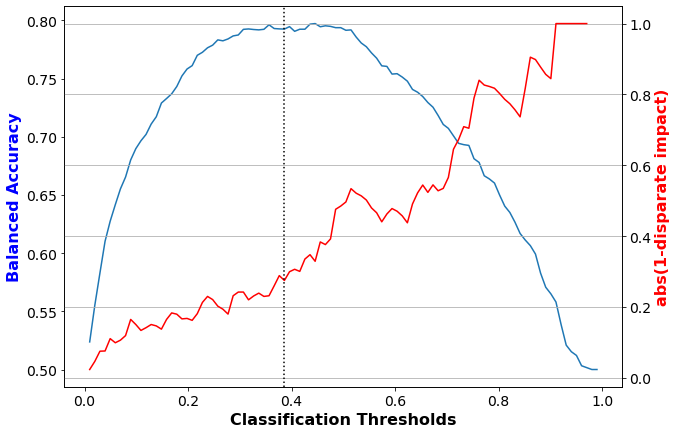

In [ ]:
# Resultados para todos os limiares no teste

fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_transf)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, np.abs(1.0-np.array(disp_imp_arr_transf)), color='r')
ax2.set_ylabel('abs(1-disparate impact)', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

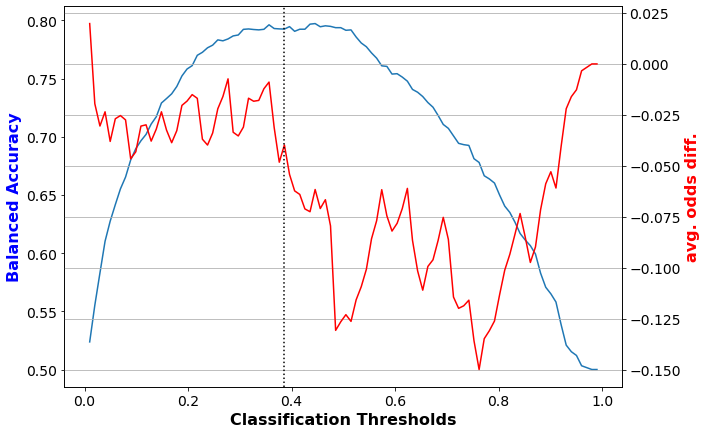

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,7))
ax1.plot(class_thresh_arr, bal_acc_arr_transf)
ax1.set_xlabel('Classification Thresholds', fontsize=16, fontweight='bold')
ax1.set_ylabel('Balanced Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2 = ax1.twinx()
ax2.plot(class_thresh_arr, avg_odds_diff_arr_transf, color='r')
ax2.set_ylabel('avg. odds diff.', color='r', fontsize=16, fontweight='bold')
ax2.axvline(best_class_thresh, color='k', linestyle=':')
ax2.yaxis.set_tick_params(labelsize=14)
ax2.grid(True)

## Exponentiated Gradient Reduction (in-processing)

In [ ]:
# Nesse caso não é realizada a busca pela melhor acurácia balanceada. O algoritmo recebe os dados do dataset de treino e então otimiza conforme um parâmetro de restrição

In [ ]:
# Inicialmente é necessário definir o classificador (estimador)

estimator = XGBClassifier(learning_rate=0.1, random_state=0)

In [ ]:
# Necessário definir dentro do algoritmo a restrição para qual ele focará, para depois fazer o fit no conjunto de treino original

# Restrições possíveis são: EqualizedOdds, DemographicParity, TruePositiveRateDifference e ErrorRateRatio.

np.random.seed(0) # Para reproducibilidade

# Usando como restrição o True Positive Rate Difference que é um alias para Equal Opportunity Difference, e sem descartar os atributos protegidos. Demais parâmetros são os padrões.

EGR = ExponentiatedGradientReduction(estimator=estimator, 
                                      constraints="TruePositiveRateDifference",
                                      eps=0.01, # Allowed fairness constraint violation
                                      T=50, # Maximum number of iterations
                                      nu=None,
                                      eta_mul=2.0, # Initial setting of the learning rate
                                      drop_prot_attr=False)

EGR.fit(df_rais_BLD_train) # No fit o algoritmo recebe o binary label dataset do aif360 que já contém definidos os labels e atributos protegidos que ele usará
df_rais_BLD_preds_EGR = EGR.predict(df_rais_BLD_test)

In [ ]:
# Visualizando as métricas de classificação e fairness para a variável SEXO após a aplicação do algoritmo

classif_metrics_xgb_EGR_sex = ClassificationMetric(df_rais_BLD_test, 
                                                  df_rais_BLD_preds_EGR,
                                                  unprivileged_groups=unprivileged_groups_sex,
                                                  privileged_groups=privileged_groups_sex)


In [ ]:
print_metrics(classif_metrics_xgb_EGR_sex)

Classification Metrics:
    Accuracy: 0.8083434099153567
    Precision: 0.7783882783882784
    Recall: 0.6843800322061192

Fairness Metrics:
    Disparate Impact Ratio: 0.8196830315354572
    Statistical Parity Difference: -0.06185051095537031
    Equal Opportunity Difference: -0.014441502334332057
    Average Odds Difference: -0.02438410301184294


In [ ]:
# Visualizando as métricas de classificação e fairness para a variável RAÇA após a aplicação do algoritmo

classif_metrics_xgb_EGR_race = ClassificationMetric(df_rais_BLD_test, 
                                                   df_rais_BLD_preds_EGR,
                                                   unprivileged_groups=unprivileged_groups_race,
                                                   privileged_groups=privileged_groups_race)

In [ ]:
print_metrics(classif_metrics_xgb_EGR_race)

Classification Metrics:
    Accuracy: 0.8083434099153567
    Precision: 0.7783882783882784
    Recall: 0.6843800322061192

Fairness Metrics:
    Disparate Impact Ratio: 0.6972518737224619
    Statistical Parity Difference: -0.10216516574056334
    Equal Opportunity Difference: -0.08866328257191203
    Average Odds Difference: -0.046944238886413074


## Reject Option Classification (post-processing)

In [ ]:
# Aplicando para a variável SEXO

# Treinando novamento o modelo nos dados originais para obtenção do limiar ótimo

X_train = df_rais_BLD_train.features
y_train = df_rais_BLD_train.labels.ravel()

modelo_xgb3 = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb3.fit(X_train, y_train)

# Índice da classe favorável
pos_ind = np.where(modelo_xgb3.classes_ == df_rais_BLD_train.favorable_label)[0][0]

In [ ]:
# Scores para os conjuntos de teste e validação

dataset_orig_valid_pred = df_rais_BLD_valid.copy(deepcopy=True)
X_valid = dataset_orig_valid_pred.features
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = modelo_xgb3.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_orig_test_pred.features
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = modelo_xgb3.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
# Buscando pelo melhor limiar de classificação no conjunto de validação considerando a acurácia balanceada, sem restrições de fairness

num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(df_rais_BLD_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups_sex,
                                             privileged_groups=privileged_groups_sex)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.7850
Optimal classification threshold (no fairness constraints) = 0.3862


In [ ]:
# Estimando melhores parâmetros para o algoritmo, considerando a variável SEXO

# Métricas permitidas no método: Statistical parity difference, Average odds difference, Equal opportunity difference

np.random.seed(1) # random seed for calibrated equal odds prediction (reproducibilidade)

ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups_sex, 
                                 privileged_groups=privileged_groups_sex, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name='Statistical parity difference',
                                  metric_ub=0.05, # metric upper bound (mantido valor padrão)
                                  metric_lb=-0.05) # metric lower bound (mantido valor padrão)
ROC = ROC.fit(df_rais_BLD_valid, dataset_orig_valid_pred)

In [ ]:
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Optimal classification threshold (with fairness constraints) = 0.3466
Optimal ROC margin = 0.0424


In [ ]:
# Resultados no conjunto de validação, sem restrições de fairness

fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

print("Validation set")
print("Raw predictions - No fairness constraints, only maximizing balanced accuracy")

metric_valid_bef = compute_metrics(df_rais_BLD_valid, dataset_orig_valid_pred,
                unprivileged_groups_sex, privileged_groups_sex)

Validation set
Raw predictions - No fairness constraints, only maximizing balanced accuracy
Balanced accuracy = 0.7850
Statistical parity difference = -0.0549
Disparate impact = 0.8786
Average odds difference = -0.0080
Equal opportunity difference = 0.0079
Theil index = 0.1240


In [ ]:
# Resultados do conjunto de validação, transformando as predições

dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

print('Validation set')
print('Transformed predictions - With fairness constraints')
metric_valid_aft = compute_metrics(df_rais_BLD_valid, dataset_transf_valid_pred, 
                unprivileged_groups_sex, privileged_groups_sex)

Validation set
Transformed predictions - With fairness constraints
Balanced accuracy = 0.7847
Statistical parity difference = 0.0173
Disparate impact = 1.0383
Average odds difference = 0.0660
Equal opportunity difference = 0.0868
Theil index = 0.1197


In [ ]:
# Verificando se métrica selecionada no método não piorou
assert np.abs(metric_valid_aft[metric_name]) <= np.abs(metric_valid_bef[metric_name])

In [ ]:
# Resultados no conjunto de teste, sem restrições de fairness

fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

print('Test set')
print('Raw predictions - No fairness constraints, only maximizing balanced accuracy')

metric_test_bef = compute_metrics(df_rais_BLD_test, dataset_orig_test_pred, 
                  unprivileged_groups_sex, privileged_groups_sex)

Test set
Raw predictions - No fairness constraints, only maximizing balanced accuracy
Balanced accuracy = 0.7934
Statistical parity difference = -0.0823
Disparate impact = 0.8149
Average odds difference = -0.0347
Equal opportunity difference = 0.0032
Theil index = 0.1198


In [ ]:
# Resultados do conjunto de teste, transformando as predições

dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

print('Test set')
print('Transformed predictions - With fairness constraints')

metric_test_aft = compute_metrics(df_rais_BLD_test, dataset_transf_test_pred, 
                unprivileged_groups_sex, privileged_groups_sex)

Test set
Transformed predictions - With fairness constraints
Balanced accuracy = 0.7950
Statistical parity difference = 0.0041
Disparate impact = 1.0092
Average odds difference = 0.0546
Equal opportunity difference = 0.1005
Theil index = 0.1142


In [ ]:
###---

In [ ]:
# Aplicando para a variável SEXO

# Treinando novamento o modelo nos dados originais para obtenção do limiar ótimo

X_train = df_rais_BLD_train.features
y_train = df_rais_BLD_train.labels.ravel()

modelo_xgb3 = XGBClassifier(learning_rate=0.1, random_state=0)
modelo_xgb3.fit(X_train, y_train)

# Índice da classe favorável
pos_ind = np.where(modelo_xgb3.classes_ == df_rais_BLD_train.favorable_label)[0][0]


In [ ]:
# Scores para os conjuntos de teste e validação

dataset_orig_valid_pred = df_rais_BLD_valid.copy(deepcopy=True)
X_valid = dataset_orig_valid_pred.features
y_valid = dataset_orig_valid_pred.labels
dataset_orig_valid_pred.scores = modelo_xgb3.predict_proba(X_valid)[:,pos_ind].reshape(-1,1)

dataset_orig_test_pred = df_rais_BLD_test.copy(deepcopy=True)
X_test = dataset_orig_test_pred.features
y_test = dataset_orig_test_pred.labels
dataset_orig_test_pred.scores = modelo_xgb3.predict_proba(X_test)[:,pos_ind].reshape(-1,1)

In [ ]:
# Buscando pelo melhor limiar de classificação no conjunto de validação considerando a acurácia balanceada, sem restrições de fairness

num_thresh = 100
ba_arr = np.zeros(num_thresh)
class_thresh_arr = np.linspace(0.01, 0.99, num_thresh)
for idx, class_thresh in enumerate(class_thresh_arr):
    
    fav_inds = dataset_orig_valid_pred.scores > class_thresh
    dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
    dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label
    
    classified_metric_orig_valid = ClassificationMetric(df_rais_BLD_valid,
                                             dataset_orig_valid_pred, 
                                             unprivileged_groups=unprivileged_groups_race,
                                             privileged_groups=privileged_groups_race)
    
    ba_arr[idx] = 0.5*(classified_metric_orig_valid.true_positive_rate()\
                       +classified_metric_orig_valid.true_negative_rate())

best_ind = np.where(ba_arr == np.max(ba_arr))[0][0]
best_class_thresh = class_thresh_arr[best_ind]

print("Best balanced accuracy (no fairness constraints) = %.4f" % np.max(ba_arr))
print("Optimal classification threshold (no fairness constraints) = %.4f" % best_class_thresh)

Best balanced accuracy (no fairness constraints) = 0.7850
Optimal classification threshold (no fairness constraints) = 0.3862


In [ ]:
# Estimando melhores parâmetros para o algoritmo, considerando a variável RAÇA

# Métricas permitidas no método: Statistical parity difference, Average odds difference, Equal opportunity difference

np.random.seed(1) # random seed for calibrated equal odds prediction (reproducibilidade)

ROC = RejectOptionClassification(unprivileged_groups=unprivileged_groups_race, 
                                 privileged_groups=privileged_groups_race, 
                                 low_class_thresh=0.01, high_class_thresh=0.99,
                                  num_class_thresh=100, num_ROC_margin=50,
                                  metric_name='Statistical parity difference',
                                  metric_ub=0.05, # metric upper bound (mantido valor padrão)
                                  metric_lb=-0.05) # metric lower bound (mantido valor padrão)
ROC = ROC.fit(df_rais_BLD_valid, dataset_orig_valid_pred)

In [ ]:
print("Optimal classification threshold (with fairness constraints) = %.4f" % ROC.classification_threshold)
print("Optimal ROC margin = %.4f" % ROC.ROC_margin)

Optimal classification threshold (with fairness constraints) = 0.3466
Optimal ROC margin = 0.0424


In [ ]:
# Resultados no conjunto de validação, sem restrições de fairness

fav_inds = dataset_orig_valid_pred.scores > best_class_thresh
dataset_orig_valid_pred.labels[fav_inds] = dataset_orig_valid_pred.favorable_label
dataset_orig_valid_pred.labels[~fav_inds] = dataset_orig_valid_pred.unfavorable_label

print("Validation set")
print("Raw predictions - No fairness constraints, only maximizing balanced accuracy")

metric_valid_bef = compute_metrics(df_rais_BLD_valid, dataset_orig_valid_pred,
                unprivileged_groups_sex, privileged_groups_sex)

Validation set
Raw predictions - No fairness constraints, only maximizing balanced accuracy
Balanced accuracy = 0.7850
Statistical parity difference = -0.0549
Disparate impact = 0.8786
Average odds difference = -0.0080
Equal opportunity difference = 0.0079
Theil index = 0.1240


In [ ]:
# Resultados do conjunto de validação, transformando as predições

dataset_transf_valid_pred = ROC.predict(dataset_orig_valid_pred)

print('Validation set')
print('Transformed predictions - With fairness constraints')
metric_valid_aft = compute_metrics(df_rais_BLD_valid, dataset_transf_valid_pred, 
                unprivileged_groups_race, privileged_groups_race)

Validation set
Transformed predictions - With fairness constraints
Balanced accuracy = 0.7842
Statistical parity difference = -0.0312
Disparate impact = 0.9294
Average odds difference = 0.0431
Equal opportunity difference = 0.0934
Theil index = 0.1247


In [ ]:
# Verificando se métrica selecionada no método não piorou
assert np.abs(metric_valid_aft[metric_name]) <= np.abs(metric_valid_bef[metric_name])

In [ ]:
# Resultados no conjunto de teste, sem restrições de fairness

fav_inds = dataset_orig_test_pred.scores > best_class_thresh
dataset_orig_test_pred.labels[fav_inds] = dataset_orig_test_pred.favorable_label
dataset_orig_test_pred.labels[~fav_inds] = dataset_orig_test_pred.unfavorable_label

print('Test set')
print('Raw predictions - No fairness constraints, only maximizing balanced accuracy')

metric_test_bef = compute_metrics(df_rais_BLD_test, dataset_orig_test_pred, 
                unprivileged_groups_race, privileged_groups_race)

Test set
Raw predictions - No fairness constraints, only maximizing balanced accuracy
Balanced accuracy = 0.7934
Statistical parity difference = -0.1799
Disparate impact = 0.5915
Average odds difference = -0.1126
Equal opportunity difference = -0.1337
Theil index = 0.1198


In [ ]:
# Resultados do conjunto de teste, transformando as predições

dataset_transf_test_pred = ROC.predict(dataset_orig_test_pred)

print('Test set')
print('Transformed predictions - With fairness constraints')

metric_test_aft = compute_metrics(df_rais_BLD_test, dataset_transf_test_pred, 
                unprivileged_groups_race, privileged_groups_race)

Test set
Transformed predictions - With fairness constraints
Balanced accuracy = 0.7961
Statistical parity difference = -0.0564
Disparate impact = 0.8703
Average odds difference = 0.0378
Equal opportunity difference = 0.0697
Theil index = 0.1172


## Métricas finais no conjunto de teste

In [ ]:
## Modelo Base com treino e teste

# SEXO
# Classification Metrics:
#     Accuracy: 0.8180169286577993
#     Precision: 0.7867383512544803
#     Recall: 0.7069243156199678

# Fairness Metrics:
#     Disparate Impact Ratio: 0.7686531734132933
#     Statistical Parity Difference: -0.08200529223547126
#     Equal Opportunity Difference: -0.0203644345341788
#     Average Odds Difference: -0.0399940903567618

# RAÇA
# Classification Metrics:
#     Accuracy: 0.8180169286577993
#     Precision: 0.7867383512544803
#     Recall: 0.7069243156199678

# Fairness Metrics:
#     Disparate Impact Ratio: 0.4547013610639061
#     Statistical Parity Difference: -0.19147619960036133
#     Equal Opportunity Difference: -0.18240270727580377
#     Average Odds Difference: -0.13578809901973393

## EGR

# EGR SEXO
# Classification Metrics:
#     Accuracy: 0.8083434099153567
#     Precision: 0.7783882783882784
#     Recall: 0.6843800322061192

# Fairness Metrics:
#     Disparate Impact Ratio: 0.8196830315354572
#     Statistical Parity Difference: -0.06185051095537031
#     Equal Opportunity Difference: -0.014441502334332057
#     Average Odds Difference: -0.02438410301184294

# EGR RAÇA
# Classification Metrics:
#     Accuracy: 0.8083434099153567
#     Precision: 0.7783882783882784
#     Recall: 0.6843800322061192

# Fairness Metrics:
#     Disparate Impact Ratio: 0.6972518737224619
#     Statistical Parity Difference: -0.10216516574056334
#     Equal Opportunity Difference: -0.08866328257191203
#     Average Odds Difference: -0.046944238886413074

In [ ]:
## Modelo Base com treino, validação e teste (acurácia balanceada)

# SEXO
# Predictions from original testing data
# Classification threshold used = 0.3862
#  29%|██▉       | 29/100 [00:00<00:00, 288.97it/s]Balanced accuracy = 0.7934
# Statistical parity difference = -0.0823
# Disparate impact = 0.8149
# Average odds difference = -0.0347
# Equal opportunity difference = 0.0032
# Theil index = 0.1198
# 100%|██████████| 100/100 [00:00<00:00, 287.26it/s]

# RAÇA
# Predictions from original testing data
# Classification threshold used = 0.3862
#  67%|██████▋   | 67/100 [00:00<00:00, 150.64it/s]Balanced accuracy = 0.7934
# Statistical parity difference = -0.1799
# Disparate impact = 0.5915
# Average odds difference = -0.1126
# Equal opportunity difference = -0.1337
# Theil index = 0.1198
# 100%|██████████| 100/100 [00:01<00:00, 55.62it/s]

## REWEIGHING - RESULTADOS OBTIDOS NO MESMO LIMIAR ÓTIMO APURADO AO SE BUSCAR A MELHOR ACURÁCIA BALANCEADA NO CONJUNTO ORIGINAL

# SEXO
# Predictions from transformed testing data
# Classification threshold used = 0.3862
#  64%|██████▍   | 64/100 [00:00<00:00, 132.31it/s]Balanced accuracy = 0.7951
# Statistical parity difference = -0.0290
# Disparate impact = 0.9337
# Average odds difference = 0.0223
# Equal opportunity difference = 0.0710
# Theil index = 0.1175
# 100%|██████████| 100/100 [00:00<00:00, 135.63it/s]

# RAÇA
# Predictions from transformed testing data
# Classification threshold used = 0.3862
#  64%|██████▍   | 64/100 [00:00<00:00, 138.42it/s]Balanced accuracy = 0.7925
# Statistical parity difference = -0.1211
# Disparate impact = 0.7251
# Average odds difference = -0.0398
# Equal opportunity difference = -0.0320
# Theil index = 0.1191
# 100%|██████████| 100/100 [00:00<00:00, 101.59it/s]

## REJECT OPTION CLASSIFICATION - RESULTADOS SÃO COM NOVO LIMIAR ÓTIMO OBTIDO PELO ALGORITMO ROC, DIFERENTEMENTE DO REWEIGHING

# SEXO
# Test set
# Transformed predictions - With fairness constraints
# Balanced accuracy = 0.7950
# Statistical parity difference = 0.0041
# Disparate impact = 1.0092
# Average odds difference = 0.0546
# Equal opportunity difference = 0.1005
# Theil index = 0.1142

# RAÇA
# Test set
# Transformed predictions - With fairness constraints
# Balanced accuracy = 0.7961
# Statistical parity difference = -0.0564
# Disparate impact = 0.8703
# Average odds difference = 0.0378
# Equal opportunity difference = 0.0697
# Theil index = 0.1172